# First Player Advantage Analysis

This notebook analyzes the tournament history data to determine if there is a statistical advantage to playing first (as Player X) in the game.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Load Tournament Data

In [2]:
# Load the tournament history
df = pd.read_csv("models_4x4x4/tournament_history.csv")

print(f"Total games: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Total games: 2184

Columns: ['timestamp', 'game_id', 'model_x', 'model_o', 'winner', 'result_score_x', 'result_score_o', 'elo_x_before', 'elo_o_before', 'elo_x_after', 'elo_o_after', 'k_factor', 'moves']


,timestamp,game_id,model_x,model_o,winner,result_score_x,result_score_o,elo_x_before,elo_o_before,elo_x_after,elo_o_after,k_factor,moves
0,2025-11-05T08:43:12.175899,1,models_4x4x4/alphazero_iter_0.pth,models_4x4x4/alphazero_iter_10.pth,O,-1,1,1000.00,1000.00,984.00,1016.00,32.0,NaN
1,2025-11-05T08:43:12.644139,2,models_4x4x4/alphazero_iter_10.pth,models_4x4x4/alphazero_iter_0.pth,X,1,-1,1016.00,984.00,1030.53,969.47,32.0,NaN
2,2025-11-05T08:43:13.493164,3,models_4x4x4/alphazero_iter_0.pth,models_4x4x4/alphazero_iter_10.pth,O,-1,1,969.47,1030.53,956.25,1043.75,32.0,NaN
3,2025-11-05T08:43:13.992718,4,models_4x4x4/alphazero_iter_10.pth,models_4x4x4/alphazero_iter_0.pth,X,1,-1,1043.75,956.25,1055.80,944.20,32.0,NaN
4,2025-11-05T08:43:14.820920,5,models_4x4x4/alphazero_iter_0.pth,models_4x4x4/alphazero_iter_10.pth,O,-1,1,944.20,1055.80,933.17,1066.83,32.0,NaN


## Overall Win Statistics

In [3]:
# Count wins by player position
winner_counts = df["winner"].value_counts()

print("Game Outcomes:")
print(winner_counts)
print(f"\nTotal games: {len(df)}")

# Preserve overall counts in distinct variables to avoid later shadowing
total_x_wins = winner_counts.get("X", 0)
total_o_wins = winner_counts.get("O", 0)
total_draws = winner_counts.get("Draw", 0)

if "X" in winner_counts:
    x_wins = total_x_wins  # legacy variable name used in earlier cells
    x_win_rate = x_wins / len(df) * 100
    print(f"\nPlayer X (first) wins: {x_wins} ({x_win_rate:.2f}%)")

if "O" in winner_counts:
    o_wins = total_o_wins  # legacy variable name used in earlier cells
    o_win_rate = o_wins / len(df) * 100
    print(f"Player O (second) wins: {o_wins} ({o_win_rate:.2f}%)")

if "Draw" in winner_counts:
    draws = total_draws
    draw_rate = draws / len(df) * 100
    print(f"Draws: {draws} ({draw_rate:.2f}%)")

Game Outcomes:
winner
X    1182
O    1002
Name: count, dtype: int64

Total games: 2184

Player X (first) wins: 1182 (54.12%)
Player O (second) wins: 1002 (45.88%)


## Visualize Win Distribution

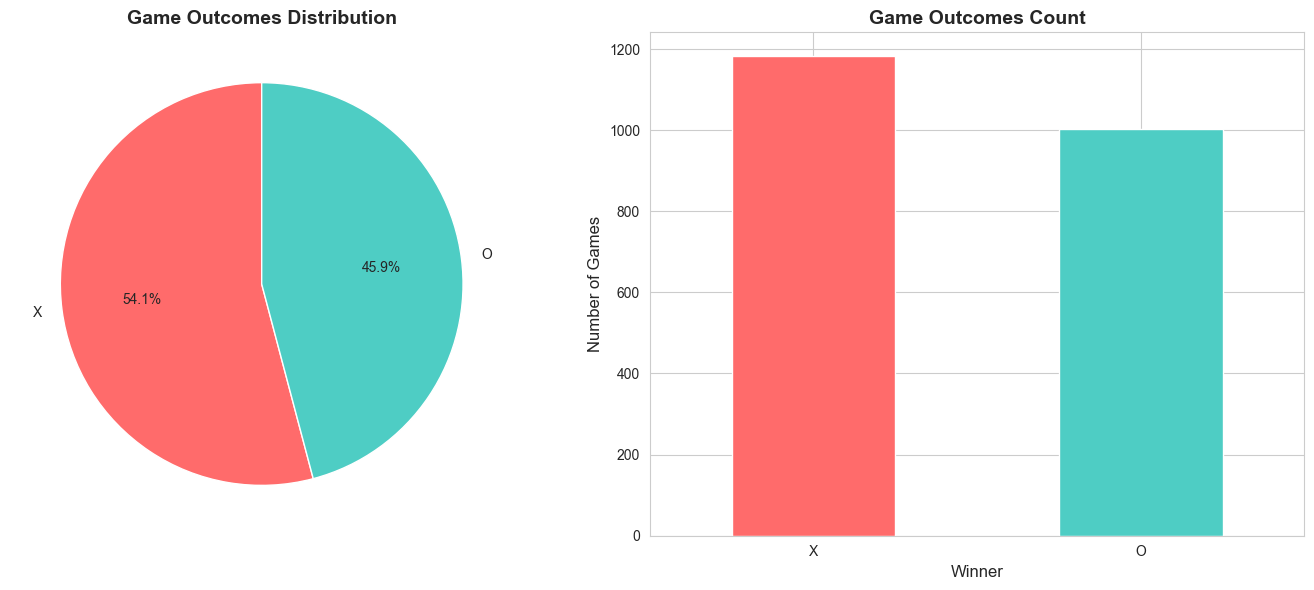

In [4]:
# Create a pie chart of outcomes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors = ["#ff6b6b", "#4ecdc4", "#95a5a6"]
winner_counts.plot(kind="pie", ax=ax1, autopct="%1.1f%%", colors=colors, startangle=90)
ax1.set_ylabel("")
ax1.set_title("Game Outcomes Distribution", fontsize=14, fontweight="bold")

# Bar chart
winner_counts.plot(kind="bar", ax=ax2, color=colors)
ax2.set_title("Game Outcomes Count", fontsize=14, fontweight="bold")
ax2.set_xlabel("Winner", fontsize=12)
ax2.set_ylabel("Number of Games", fontsize=12)
ax2.tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

## Statistical Significance Test

We'll perform a chi-square test to determine if the difference in win rates is statistically significant.

In [5]:
# Extract counts (excluding draws for the test)
x_wins = winner_counts.get("X", 0)
o_wins = winner_counts.get("O", 0)

# Chi-square test for equal proportions
# H0: X and O have equal win rates
# H1: X and O have different win rates

observed = [x_wins, o_wins]
expected = [(x_wins + o_wins) / 2, (x_wins + o_wins) / 2]

chi2, p_value = stats.chisquare(observed, expected)

print("Chi-Square Test for First Player Advantage")
print("=" * 50)
print(f"Null Hypothesis: Both players have equal chance of winning")
print(f"\nObserved wins:")
print(f"  Player X (first):  {x_wins}")
print(f"  Player O (second): {o_wins}")
print(f"\nExpected wins (if no advantage): {expected[0]:.1f} each")
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nSignificance level: 0.05")

if p_value < 0.05:
    print(f"\n✓ SIGNIFICANT: The difference is statistically significant (p < 0.05)")
    if x_wins > o_wins:
        advantage = (x_wins - o_wins) / (x_wins + o_wins) * 100
        print(f"  There IS a first-player advantage of {advantage:.2f}% in win rate.")
    else:
        advantage = (o_wins - x_wins) / (x_wins + o_wins) * 100
        print(f"  There IS a second-player advantage of {advantage:.2f}% in win rate.")
else:
    print(
        f"\n✗ NOT SIGNIFICANT: The difference is not statistically significant (p ≥ 0.05)"
    )
    print(f"  No conclusive evidence of first-player advantage.")

Chi-Square Test for First Player Advantage
Null Hypothesis: Both players have equal chance of winning

Observed wins:
  Player X (first):  1182
  Player O (second): 1002

Expected wins (if no advantage): 1092.0 each

Chi-square statistic: 14.8352
P-value: 0.0001

Significance level: 0.05

✓ SIGNIFICANT: The difference is statistically significant (p < 0.05)
  There IS a first-player advantage of 8.24% in win rate.


## Win Rate by Model Pairing

Let's check if the first-player advantage holds across different model matchups.

In [6]:
# Create a matchup identifier
df["matchup"] = df.apply(
    lambda row: tuple(sorted([row["model_x"], row["model_o"]])), axis=1
)

# For each unique matchup, count X vs O wins without overwriting global totals
matchup_stats = []
for matchup in df["matchup"].unique():
    matchup_games = df[df["matchup"] == matchup]
    x_wins_m = len(matchup_games[matchup_games["winner"] == "X"])  # local variable
    o_wins_m = len(matchup_games[matchup_games["winner"] == "O"])  # local variable
    draws_m = len(matchup_games[matchup_games["winner"] == "Draw"])  # local variable
    total_m = len(matchup_games)

    matchup_stats.append(
        {
            "matchup": f"{matchup[0].split('/')[-1]} vs {matchup[1].split('/')[-1]}",
            "total_games": total_m,
            "x_wins": x_wins_m,
            "o_wins": o_wins_m,
            "draws": draws_m,
            "x_win_rate": x_wins_m / total_m * 100 if total_m > 0 else 0,
        }
    )

matchup_df = pd.DataFrame(matchup_stats).sort_values("total_games", ascending=False)

print("Win rates by matchup (top 10 by game count):")
print(matchup_df.head(10).to_string(index=False))

Win rates by matchup (top 10 by game count):
                                       matchup  total_games  x_wins  o_wins  draws  x_win_rate
 alphazero_iter_0.pth vs alphazero_iter_10.pth           72      36      36      0        50.0
alphazero_iter_10.pth vs alphazero_iter_20.pth           66      33      33      0        50.0
 alphazero_iter_0.pth vs alphazero_iter_20.pth           66      33      33      0        50.0
 alphazero_iter_0.pth vs alphazero_iter_30.pth           60      30      30      0        50.0
alphazero_iter_20.pth vs alphazero_iter_30.pth           60      30      30      0        50.0
alphazero_iter_10.pth vs alphazero_iter_30.pth           60      30      30      0        50.0
 alphazero_iter_0.pth vs alphazero_iter_40.pth           54      27      27      0        50.0
alphazero_iter_10.pth vs alphazero_iter_40.pth           54      27      27      0        50.0
alphazero_iter_20.pth vs alphazero_iter_40.pth           54      27      27      0        50.0
alpha

## Visualize First Player Win Rate Across Matchups

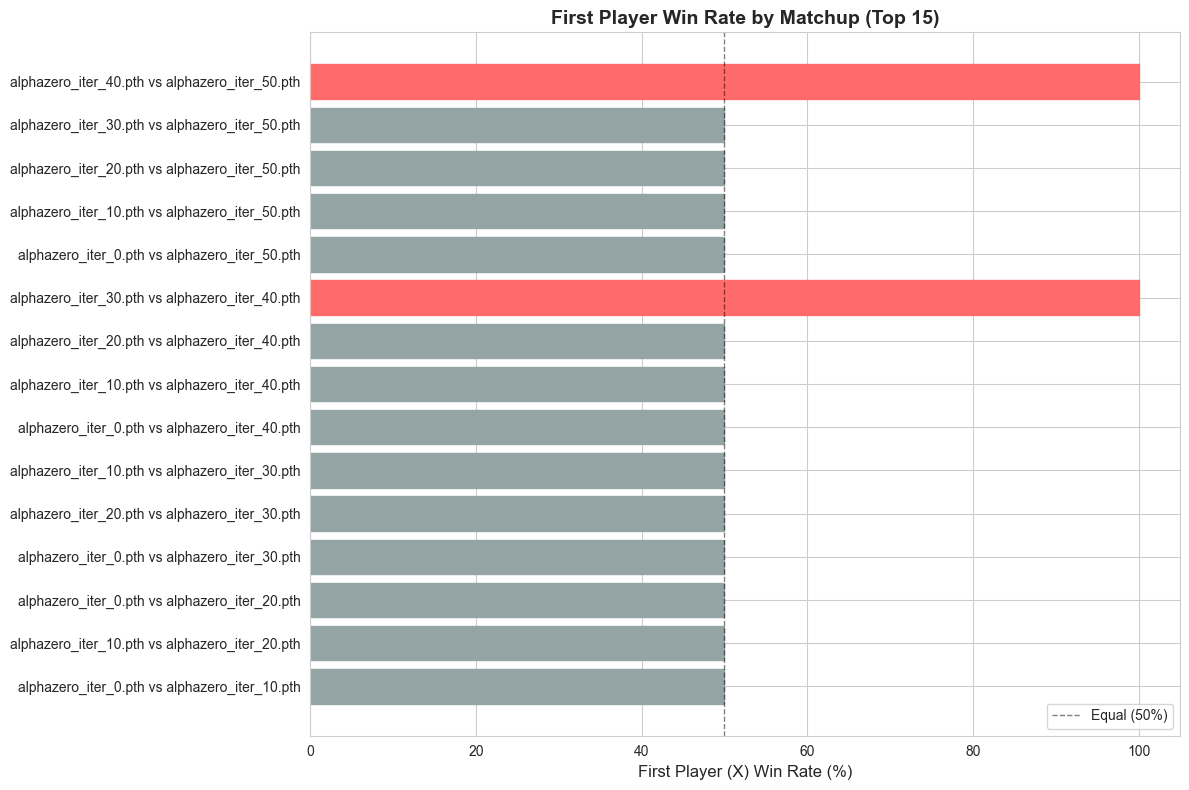

In [7]:
# Plot X win rate for top matchups
top_matchups = matchup_df.head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_matchups)), top_matchups["x_win_rate"])

# Color bars based on win rate
for i, (bar, rate) in enumerate(zip(bars, top_matchups["x_win_rate"])):
    if rate > 55:
        bar.set_color("#ff6b6b")  # Strong advantage
    elif rate > 50:
        bar.set_color("#ffa07a")  # Slight advantage
    elif rate == 50:
        bar.set_color("#95a5a6")  # Equal
    else:
        bar.set_color("#4ecdc4")  # Second player advantage

plt.yticks(range(len(top_matchups)), top_matchups["matchup"])
plt.xlabel("First Player (X) Win Rate (%)", fontsize=12)
plt.title("First Player Win Rate by Matchup (Top 15)", fontsize=14, fontweight="bold")
plt.axvline(
    x=50, color="black", linestyle="--", linewidth=1, alpha=0.5, label="Equal (50%)"
)
plt.legend()
plt.tight_layout()
plt.show()

## Confidence Interval for First Player Win Rate

In [8]:
# Calculate confidence interval for X win rate (excluding draws)
# Also perform exact binomial test for comparison
decided_games = total_x_wins + total_o_wins
x_win_proportion = total_x_wins / decided_games if decided_games > 0 else 0

if decided_games > 0:
    # Exact binomial test (H0: p = 0.5)
    try:
        binom_res = stats.binomtest(
            total_x_wins, decided_games, p=0.5, alternative="two-sided"
        )
        binom_p = binom_res.pvalue
    except AttributeError:
        # Fallback for older SciPy versions
        binom_p = stats.binom_test(total_x_wins, decided_games, p=0.5)

    # Wald (simple) interval
    se = np.sqrt(x_win_proportion * (1 - x_win_proportion) / decided_games)
    ci_lower_wald = x_win_proportion - 1.96 * se
    ci_upper_wald = x_win_proportion + 1.96 * se

    # Wilson interval
    z = 1.96
    denom = 1 + z**2 / decided_games
    center = (x_win_proportion + z**2 / (2 * decided_games)) / denom
    adj = (
        z
        * np.sqrt(
            (x_win_proportion * (1 - x_win_proportion) + z**2 / (4 * decided_games))
            / decided_games
        )
        / denom
    )
    ci_lower_wilson = center - adj
    ci_upper_wilson = center + adj

    print("First Player Win Rate (excluding draws)")
    print("=" * 60)
    print(
        f"Win rate (X): {x_win_proportion * 100:.2f}%  (X wins: {total_x_wins} / {decided_games})"
    )
    print(f"Wald 95% CI:   [{ci_lower_wald * 100:.2f}%, {ci_upper_wald * 100:.2f}%]")
    print(
        f"Wilson 95% CI: [{ci_lower_wilson * 100:.2f}%, {ci_upper_wilson * 100:.2f}%]"
    )
    print(f"Exact Binomial Test p-value: {binom_p:.4f}")

    if ci_lower_wilson > 0.5:
        print("\n✓ Wilson CI entirely above 50%: clear first-player advantage.")
    elif ci_upper_wilson < 0.5:
        print("\n✗ Wilson CI entirely below 50%: second-player advantage.")
    else:
        print("\n≈ Wilson CI includes 50%: no conclusive advantage.")
else:
    print("No decided games to analyze.")

First Player Win Rate (excluding draws)
Win rate (X): 54.12%  (X wins: 1182 / 2184)
Wald 95% CI:   [52.03%, 56.21%]
Wilson 95% CI: [52.03%, 56.20%]
Exact Binomial Test p-value: 0.0001

✓ Wilson CI entirely above 50%: clear first-player advantage.


## Summary and Conclusion

In [9]:
print("SUMMARY")
print("=" * 60)
print(f"Total games analyzed: {len(df)}")
print(f"Decided games (excluding draws): {total_x_wins + total_o_wins}")
print(f"\nOverall Results:")
print(f"  Player X (first) wins:  {total_x_wins} ({total_x_wins / len(df) * 100:.2f}%)")
print(f"  Player O (second) wins: {total_o_wins} ({total_o_wins / len(df) * 100:.2f}%)")
print(f"  Draws: {total_draws} ({total_draws / len(df) * 100:.2f}%)")

# Recompute chi-square with updated total counts
observed_totals = [total_x_wins, total_o_wins]
expected_totals = [(total_x_wins + total_o_wins) / 2] * 2
chi2_totals, p_value_totals = stats.chisquare(observed_totals, expected_totals)

# Wilson CI already computed in prior cell; recompute here to reference variables safely
if total_x_wins + total_o_wins > 0:
    decided_games = total_x_wins + total_o_wins
    x_win_proportion = total_x_wins / decided_games
    z = 1.96
    denom = 1 + z**2 / decided_games
    center = (x_win_proportion + z**2 / (2 * decided_games)) / denom
    adj = (
        z
        * np.sqrt(
            (x_win_proportion * (1 - x_win_proportion) + z**2 / (4 * decided_games))
            / decided_games
        )
        / denom
    )
    ci_lower_wilson = center - adj
    ci_upper_wilson = center + adj
else:
    ci_lower_wilson = ci_upper_wilson = float("nan")

print(f"\nStatistical Test (Chi-square for win rate difference):")
print(f"  Chi2: {chi2_totals:.4f}  P-value: {p_value_totals:.4f}")
print(f"  Significant at α=0.05: {'Yes' if p_value_totals < 0.05 else 'No'}")
print(
    f"\nWilson 95% CI for X win rate (decided games): [{ci_lower_wilson * 100:.2f}%, {ci_upper_wilson * 100:.2f}%]"
)

print("\n" + "=" * 60)
if p_value_totals < 0.05 and ci_lower_wilson > 0.5:
    print("CONCLUSION: Statistically significant first-player advantage.")
elif p_value_totals < 0.05 and ci_upper_wilson < 0.5:
    print("CONCLUSION: Statistically significant second-player advantage.")
else:
    print(
        "CONCLUSION: No statistically significant advantage detected (at 95% confidence)."
    )
print("=" * 60)

SUMMARY
Total games analyzed: 2184
Decided games (excluding draws): 2184

Overall Results:
  Player X (first) wins:  1182 (54.12%)
  Player O (second) wins: 1002 (45.88%)
  Draws: 0 (0.00%)

Statistical Test (Chi-square for win rate difference):
  Chi2: 14.8352  P-value: 0.0001
  Significant at α=0.05: Yes

Wilson 95% CI for X win rate (decided games): [52.03%, 56.20%]

CONCLUSION: Statistically significant first-player advantage.


## High-Iteration Model Analysis (iter > 50)
In this section we restrict to games where BOTH participating models are iteration > 50, to see if first-player advantage changes as models mature.

In [11]:
# Filter games where both models have iteration > 30 and analyze first-player advantage
import re

# Extract iteration numbers if not already
if "iter_x" not in df.columns:
    df["iter_x"] = df["model_x"].str.extract(r"iter_(\d+)").astype(float)
if "iter_o" not in df.columns:
    df["iter_o"] = df["model_o"].str.extract(r"iter_(\d+)").astype(float)

high_df = df[(df["iter_x"] > 30) & (df["iter_o"] > 30)]
print(f"Total high-iteration games (both > 30): {len(high_df)}")

if len(high_df) == 0:
    print("No games meet the high-iteration (>30) criterion yet.")
else:
    high_winner_counts = high_df["winner"].value_counts()
    high_x_wins = high_winner_counts.get("X", 0)
    high_o_wins = high_winner_counts.get("O", 0)
    high_draws = high_winner_counts.get("Draw", 0)
    high_decided = high_x_wins + high_o_wins

    print("\nOutcome counts (high-iteration subset):")
    print(high_winner_counts)

    if high_decided > 0:
        # Exact binomial test
        try:
            high_binom_res = stats.binomtest(high_x_wins, high_decided, p=0.5)
            high_p_binom = high_binom_res.pvalue
        except AttributeError:
            high_p_binom = stats.binom_test(high_x_wins, high_decided, p=0.5)

        p_hat = high_x_wins / high_decided
        z = 1.96
        denom = 1 + z**2 / high_decided
        center = (p_hat + z**2 / (2 * high_decided)) / denom
        adj = (
            z
            * np.sqrt((p_hat * (1 - p_hat) + z**2 / (4 * high_decided)) / high_decided)
            / denom
        )
        wilson_low = center - adj
        wilson_high = center + adj

        print(f"\nFirst player (X) win rate (decided only): {p_hat * 100:.2f}%")
        print(f"Wilson 95% CI: [{wilson_low * 100:.2f}%, {wilson_high * 100:.2f}%]")
        print(f"Exact binomial p-value: {high_p_binom:.4f}")

        if wilson_low > 0.5:
            print("✓ Advantage: CI entirely above 50%.")
        elif wilson_high < 0.5:
            print("✗ Second-player advantage: CI entirely below 50%.")
        else:
            print("≈ No conclusive advantage (CI includes 50%).")

    # Compare vs overall
    overall_p_hat = (
        (total_x_wins / (total_x_wins + total_o_wins))
        if (total_x_wins + total_o_wins) > 0
        else float("nan")
    )
    print("\nComparison to overall decided-game first-player win rate:")
    print(f"Overall X decided-game win rate: {overall_p_hat * 100:.2f}%")
    if high_decided > 0:
        diff = (p_hat - overall_p_hat) * 100
        direction = "higher" if diff > 0 else "lower"
        print(
            f"High-iteration subset win rate is {abs(diff):.2f} percentage points {direction} than overall."
        )

Total high-iteration games (both > 30): 720

Outcome counts (high-iteration subset):
winner
X    432
O    288
Name: count, dtype: int64

First player (X) win rate (decided only): 60.00%
Wilson 95% CI: [56.38%, 63.52%]
Exact binomial p-value: 0.0000
✓ Advantage: CI entirely above 50%.

Comparison to overall decided-game first-player win rate:
Overall X decided-game win rate: 54.12%
High-iteration subset win rate is 5.88 percentage points higher than overall.
